#  Projet: Modèle de scoring



L'objectif de ce mini projet est de prédire a l'aide d'un modèle de scoring très simple si un client remboursera ou non un prêt ou s'il aura des difficultés. Il sera question pour nous de construire un modèle d'apprentissage pour aider la communauté (les entreprises bancaires) dans l'octroie du crédit. Pour cela nous allons suivre la demarche presentée ci dessous:

  ### **1 - Importer tous les packages necessaires a notre étude**

  ### **2 - Télécharger et lire les données**
  
  ### **3 - Faire une Analyse Exploratoire des données**
  
  ### **4 - Nettoyer les données**
  
  ### **5 - Selectionner les donnees les plus importantes**
  
  ### **6 - Créer et entraîner un modèle simple**
  
  ### **7 - évaluer le modèle avec la métrique de performance AUC**
  
  ### **8 - produire des graphes d'evaluation des performances**
  
  ### **9 - améliorer la performance du modèle**
  
  ### **10 - Interpréter le modèle final**

## 1-Importer tous les packages necessaires a notre étude

In [120]:
# numpy et pandas pour la manipulation des données
import numpy as np
import pandas as pd 

# sklearn  pour le prétraitement des variables catégoriques
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Pour la Suppression des avertissements 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les figures
import matplotlib.pyplot as plt
import seaborn as sns

## 2-Télécharger et lire les données

In [121]:
# Liste des fichiers disponibles
print(os.listdir("../projet Hoollye/data/"))

['credit_card_balance.csv', 'POS_CASH_balance.csv', 'HomeCredit_columns_description.csv', 'application_train.csv', 'bureau.csv', 'installments_payments.csv', 'application_test.csv', 'sample_submission.csv', 'bureau_balance.csv', 'previous_application.csv']


Il y a au total 9 dossiers parmis lesquels 1 fichier principal pour l'entrainement et 1 fichier principal pour le test

In [122]:
# Donnees d'entrainement
app_train = pd.read_csv('../projet Hoollye/data/application_train.csv')
print('Dimension des donnees d''entrainement: ', app_train.shape)
app_train.head()

Dimension des donnees dentrainement:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Les données de formation comportent 307511 observations  et 122 caractéristiques (variables), y compris le TARGET (l'étiquette que nous voulons prévoir).

In [123]:
# Testing data features
app_test = pd.read_csv('../projet Hoollye/data/application_test.csv')
print('Dimension des donnees de test: ', app_test.shape)
app_test.head()

Dimension des donnees de test:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


L'ensemble de test est plus petit et ne comporte pas de colonne TARGET.

## 3-Faire une Analyse Exploratoire des données

### 3.1- Distribution de la colone cible

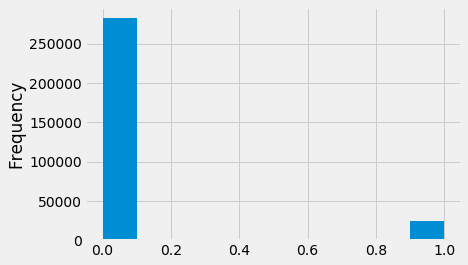

In [124]:
app_train['TARGET'].value_counts()
app_train['TARGET'].astype(int).plot.hist();

Nous remarquons que les données de la colonne cible sont déséquilibres


### 3.2-consultation des valeurs manquantes

In [125]:
# La fonction ci dessous permet d'estimer les donnees manquantes par colonne

def missing_values_table(df):
    
        # Total donnees manquantes
        mis_val = df.isnull().sum()
        
        # Pourcentage donnees manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # creation d'une table avec les resultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Attribution des noms de colonne
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Rangement de la table par pourcentage de valeurs manquantes decroissante
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # recapitulatif 
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [126]:
# Statistiques des donnees manquantes
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [127]:
# Estimation du nombre de chaque type de colonne 
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [128]:
# Nombre de classe unique dans chaque colonne de type objet
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

la plupart des variables categoriques ont un tres petit nombre de classe

## 4-Nettoyer les données

### 4.1- Encodage des  Variables Categoriques

pour toute variable catégorique (dtype == objet) avec 2 catégories uniques, nous utiliserons un codage par étiquette (label encoding), et pour toute variable catégorique avec plus de 2 catégories uniques, nous utiliserons un one-hot encoding.

nous utilisons Scikit-Learn pour le LabelEncoder et pour one-hot encoding, la fonction get_dummies(df) de pandas.

In [129]:
# Creation de l'objet label encoder
le = LabelEncoder()
le_count = 0

# Iteration a travers les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # si 2 ou plusieurs categories unique 
        if len(list(app_train[col].unique())) <= 2:
            # entrainement 
            le.fit(app_train[col])
            # Transformation des donnees d'entrainement et de test
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # compter le nombre de colonne encode
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [130]:
# one-hot encoding 
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)


### 4.2- Alignement des données d'entrainement et de test

In [131]:
train_labels = app_train['TARGET']

#  ne conserver que les colonnes présentes dans les deux jeux de données
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels


## 5- Selectionner les donnees les plus importantes

### 5.1 - Correlations

In [132]:
# Trouver des corrélations avec la cible et trier
correlations = app_train.corr()['TARGET'].sort_values()

# Afficher les correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

le DAYS_BIRTH est la corrélation la plus positive. DAYS_BIRTH est l'âge en jours du client au moment du prêt en jours négatifs. La corrélation est positive, mais la valeur de cette caractéristique est en fait négative, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de ne pas rembourser son prêt . C'est un peu déroutant, alors nous prendrons la valeur absolue de la caractéristique et la corrélation sera négative.

### 5.2- Effet de l'âge sur le remboursement

In [133]:
# Trouver la corrélation entre les jours positifs depuis la naissance et la cible
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

Plus le client vieillit, plus il y a une relation linéaire négative avec la cible, ce qui signifie qu'à mesure que le client vieillit, il a tendance à rembourser ses prêts à temps plus souvent.
nous pouvons faire un histogramme de l'âge.


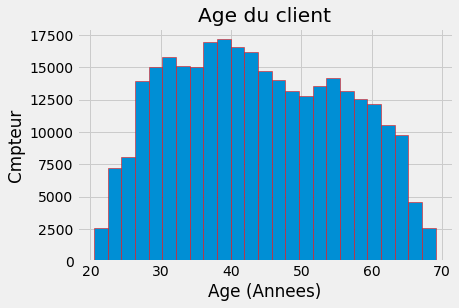

In [134]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'r', bins = 25)
plt.title('Age du client'); plt.xlabel('Age (Annees)'); plt.ylabel('Cmpteur');

la répartition des âges ne nous dit pas grand-chose

### 5.3 - Effets des sources exterieures

Les 3 variables présentant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3.

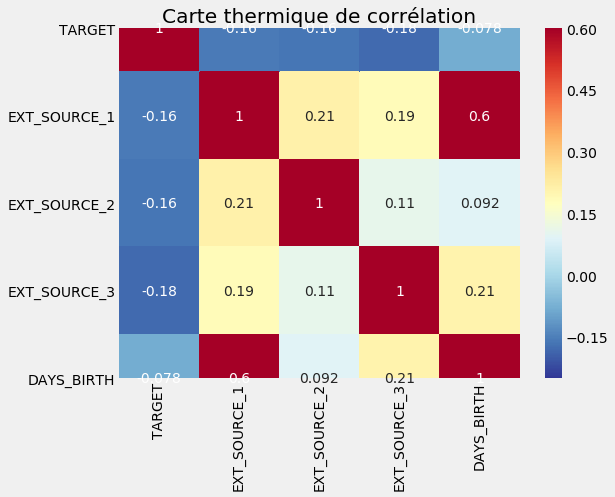

In [135]:
# Extraction des variables 
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
plt.figure(figsize = (8, 6))

# Carte thermique de corrélation
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Carte thermique de corrélation');


Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique que plus la valeur de l'EXT_SOURCE augmente, plus le client est susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, ce qui indique que l'un des facteurs de ce score est peut-être l'âge du client.

## 6- Création et entraînement un modèle simple

### 6-1 : Pretraitement

In [136]:
app_train.fillna(app_train.median(), inplace=True)

In [137]:
from sklearn.model_selection import train_test_split
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.TARGET
class_names = app_train.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

### 6.2-entraînement du modèle (Random Forest)

In [138]:
#Importation du modele Random Forest 
from sklearn.ensemble import RandomForestClassifier

#Creation  du Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#entrainement du modele
clf.fit(features_train, target_train)




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


#### 6.2.1 - Prediction

In [ ]:
y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

#### 6.2.2 Score

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.919337268100743

## 7 - Evaluation du modele a l'aide de la metrique AUC

In [168]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, y_pred)


0.5004946810631014

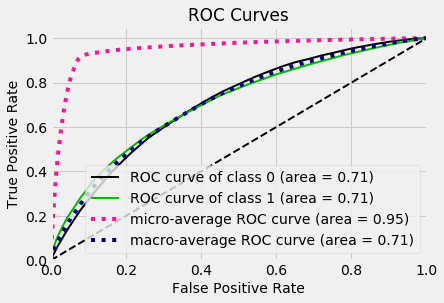

In [153]:
import matplotlib.pyplot as plt
import scikitplot as skplt


skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

## 8- graphes d'evaluation des performances

### 8.1- cumulative gain curve

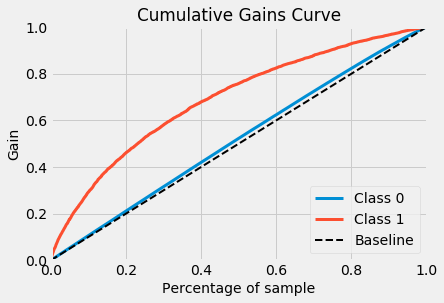

In [155]:
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

### 8.2- lift curve|

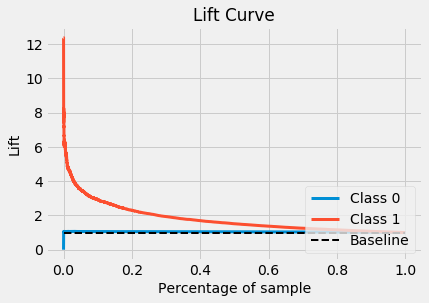

In [158]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

### 8.3- ks_statistic plot

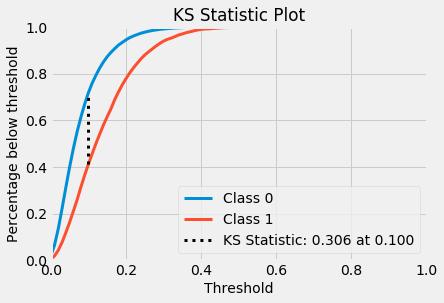

In [159]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

## 9- amélioration des performances du modèle

### 9.1- Extraction des variables importances

In [165]:
# Extraction des variables importances
features = list(app_train.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [171]:
def plot_feature_importances(df):
    
    # classer les variables par ordre d'importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normaliser les variables
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # tracer un bar chart horizontale
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # representer les plus importants au sommet
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    

    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # representation graphique
    plt.xlabel(' Importance Normaliser'); plt.title('variables Importantes')
    plt.show()
    
    return df

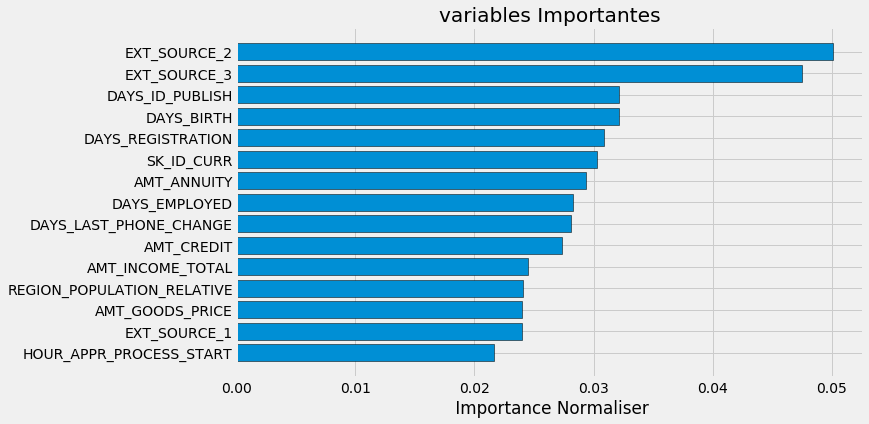

In [172]:
feature_importances_sorted = plot_feature_importances(feature_importances)

### 9.2- choisir des meilleurs hyperparamètres

Nous allons utiliser ici la fonction GridSearch afin d'avoir les parametres optimales du modele

## 10- Interprétation du modèle final